# Ford GoBike System Presentation
## by (Obichukwu Valentine Nzelu)


## Investigation Overview

>I will focus on the influence of the three critical variables;  age, user_type, and member_gender on duration of trips.

>I will start by showing the distribution of duration_min variable, then I will demonstrate how duration varies with member_gender and age

>I will demonstrate how duration varies with member_gender, user type, start hour, and days. I will also demonstrate how bikes were used based on these features, followed by the relationship between bike usage and  member_gender on different days and at different hours.






## Dataset Overview

> The dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area in February, 2019. The original dataset has 183412 rows and 16 columns; after wrangling, the dataset has 174952 rows and 24 columns. 
These variables includes the start and end time of the trip, its duration, the start and end station as well as the characterstics of the users such as gender, age and user type (subscriber or customer). 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('Ford_GoBike_clean.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,duration_min,date,time,day_date,day_name,start_hour,age,week_day_end
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Male,No,869.750000,2019-02-28,17:32:10.145000,28,Thursday,17,35,Weekday
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Male,No,1030.900000,2019-02-28,12:13:13.218000,28,Thursday,12,47,Weekday
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Other,No,608.166667,2019-02-28,17:54:26.010000,28,Thursday,17,30,Weekday
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Male,Yes,26.416667,2019-02-28,23:54:18.549000,28,Thursday,23,45,Weekday
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Male,No,29.883333,2019-02-28,23:49:58.632000,28,Thursday,23,60,Weekday


In [3]:
#Checking the shape of the data

df.shape

(174952, 24)

In [4]:
#checking the features of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  int64  
 14  memb

In [5]:
# convert start_day into ordered categorical type
weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday']
ordered_weekdays = pd.api.types.CategoricalDtype(ordered = True, categories = weekdays)
df['day_name'] = df['day_name'].astype(ordered_weekdays)

In [6]:
# convert gender into ordered categorical type
df.member_gender = df.member_gender.astype('category')

## Distribution of Ride Duration
 

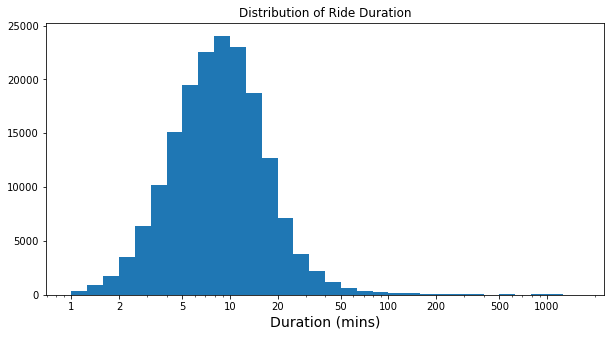

In [7]:
#plot data on a log scale to change to a normal distribution
log_binsize = 0.1
bins = 10 ** np.arange(0.0, np.log10(df['duration_min'].max())+log_binsize, log_binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = df, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000], [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000])
plt.xlabel('Duration (mins)', fontsize = 14)
plt.title('Distribution of Ride Duration');
plt.show()

 Majority of the ride durations fall between 7 and 12 minutes with very few rides exceeding the 60 minutes mark. This could be as a result of the number of male bike riders who ride for a shorter duration of time

## Duration of Ride by Member Gender and User Type

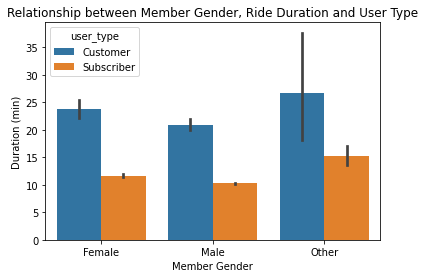

In [8]:
sb.barplot(data = df, x = 'member_gender', y = 'duration_min', hue = 'user_type');
plt.title('Relationship between Member Gender, Ride Duration and User Type');
plt.xlabel('Member Gender');
plt.ylabel('Duration (min)');

The other gender generally have longer bike trip duration for both the Customer and subscriber user types. We can also observe that the Male gender spend the least time on bike trips for the two user types as well

## Duration of Ride by Age

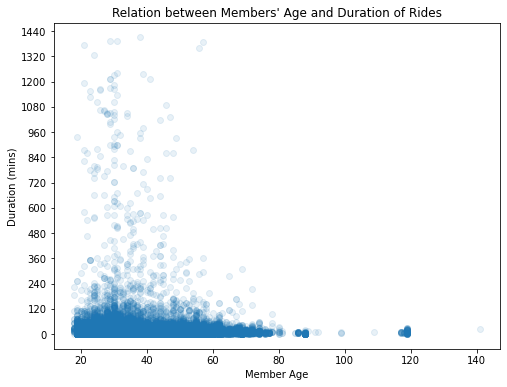

In [9]:
plt.figure(figsize=[8, 6])
plt.scatter(data = df, x = 'age', y = 'duration_min', alpha = 1/10);
plt.yticks( range(0,1500,120) )
plt.xlabel('Member Age');
plt.ylabel('Duration (mins)');
plt.title('Relation between Members\' Age and Duration of Rides');

The above visualization shows that the duration of bike rides is lower for older people, while younger people spend more time on bike trips

## Bike Usage by Gender



First we show the daily usage of the bike sharing service on Weekdays and Weekends

In [10]:
def gender_plot(col_name):
    plt.figure(figsize=[10, 5])
    sb.countplot(data = df, x = col_name, hue = 'member_gender')
    plt.xlabel(col_name, fontsize = 14)
    plt.title('Ride Duration of Member_Gender during the Week')
    plt.show();
    

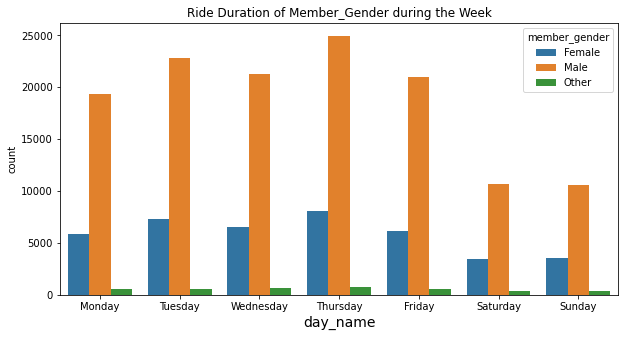

In [11]:
gender_plot('day_name')

next we show the daily usage of the bike sharing service by start_hour

In [12]:
def gender_plot2(col_name):
    plt.figure(figsize=[10, 5])
    sb.countplot(data = df, x = col_name, hue = 'member_gender')
    plt.xlabel(col_name, fontsize = 14)
    plt.title('Ride Duration of Member_Gender by Start_hour')
    plt.show();
    

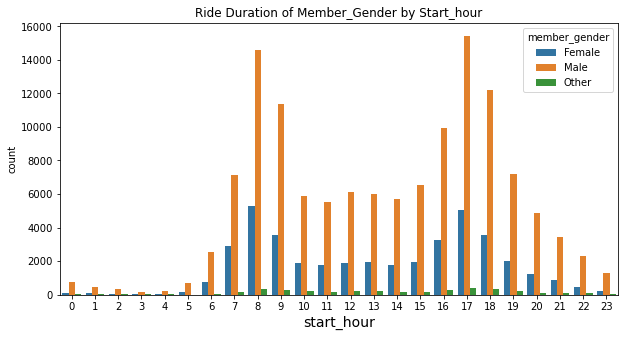

In [13]:
gender_plot2('start_hour')

The above visualizations show that:

* There are more male bike users than any other gender type
* The peak period for all bike users (Male,Female and Others) are at 8am and 5pm which happpen to be the resumption and close of works hours

## Conclusions

* The analysis of the dataset tells us that most rides occurs during morning and evening sessions, this could mean that users of the bike-sharing scheme in San Francisco Bay are workers
* There are less female gender participating in the bike-sharing program, so the owners of the program can emply the use of targeted marketing ads to the female and other non gender specific groups
* The bike sharing service should be targeted at younger people as they have longer bike trip durations